(nm_roots_of_equations)=
# Roots of equations
```{index} Finding roots of equations numerically
```

## Linear equations

A system is said to be linear if it can be represented by a linear function (i.e. a straight line in 1D):

\\[ f(x) = a + kx,\\]

where \\(f(x)\\) is a quantity of interest that depends on some variable \\(x\\), which can be quantified through measurements or observations. 

```{margin} Note
Our aim will be to find a solution \\(x\\) to this equation. Note that for linear problems this is trivial if the problem is scalar valued, meaning that solving the above linear equation should be not be a problem for any of you. However, of we consider linear systems for vectors - i.e. matrix systems, where instead of \\(x\\) we have a matrix, and instead of \\(f(x)\\) we have another matrix. \\(a\\) and \\(k\\) could also be matrices too! 
```

To a linear system we can associate a linear equation, where we set the function to be equal to something, hence the word equation. It can be written in the form:

\\[ f(x) = 0 \quad \text{where} \quad f(x) = a + kx.\\]

We've set the function equal to something (here we chose zero) to obtain an equation.

## Non-linearity

The majority of real world systems cannot be expressed in such simple (linear) terms. They are then called nonlinear systems, and equations representing them contain terms like:


- \\( x^2, x^3,\ldots\\), e.g. higher \\(>1\\) order powers that would appear in polynomials.


- \\( \sqrt{x}, x^{1/3}, x^{\pi},\ldots\\), e.g. roots, radicals and other non-integer polynomials.


- \\(\tan(x), \sin(x), \log(x), \text{erf}(x), \ldots\\), e.g. trigonometric and other [special functions](https://en.wikipedia.org/wiki/Special_functions).

You should be familiar, for example, with quadratic equations \\(f(x) = a x^2 + bx + c = 0\\), for which there exist the well known analytic solutions:

\\[x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.\\]

The solutions are commonly referred to as the **roots** of the equation - this means that \\(f(x_{1}) = f(x_{2}) =0\\).

```{note}
:class: dropdown
The discretisations of nonlinear ODEs or PDEs (e.g. being nonlinear in order to accurately represent the nonlinear real world) results in nonlinear discrete systems for which we need to make use of techniques such as those introduced in this notebok. Discretization is the process of transferring continuous functions, models, variables, and equations into discrete counterparts. Discretizing ODEs or PDEs often mean we concern ourselves with a limited range for the ODEs and the PDEs, where we are actually interested. For example, ODEs and PDEs can be used to describe fluid motion, and a key parameter in the motion of material in Earth's mantle (Earth's mantle can be considered, on the geological time scale of things, to be a fluid with no strength) is temperature. However, we know that the Earth's mantle could only possibly be within a certain temperature range, i.e. we are not expecting the mantle to be close to absolute zero, or to be hotter than the Sun, so we limit ourselves to analyzing a limited range of temperatures for our PDEs and ODEs. If your solution to ODE or PDE somehow ends up telling you that the interior of the Earth is hotter than the Sun in your simulations, you might want to double check why Earth is not undergoing nuclear fusion!!
```

### Example
An example of a nonlinear problem without trivial solution is:

\\[ x = \tan(x).\\]

There is no exact analytic solution to this equation, so we have to devise methods to find approximate solutions. That is, we are looking for \\(x_{\text{approx}}\\) such that 

\\[ x _{\text{approx}} \approx \tan(x_{\text{approx}}) \\]

to a set *tolerance* (or *precision*). 

Note that we can of course equivalently look to solve the problem 

\\[ f(x) \approx 0 \quad\text{where}\quad f(x)= x - \tan(x), \\]

or equivalently we could instead choose to define \\(f(x)= \tan(x) - x\\).

We will often do this (move all terms of our equation to one side and set equal to zero) to make our presentation of the theory below, as well as our implementation of solvers, generic. In this context a solution to the problem \\(f(x)=0\\) is called a root.

(nm_picards_method)=
## Picard's method of successive approximations (or fixed point iteration)
```{index} Picard's method
```
### Fixed points


```{margin} Note
Of course if we're given a problem of the second type we can make it look like the first simply by defining \\(f(x) = x-g(x)\\) or \\(f(x) = g(x)-x,\\) as we did for the problem involving \\(\tan\\\) above.
```
Before moving on to problems written in the completely general form \\(f(x) = 0\\), in this section we will consider equations that can be written as:

\\[ x = g(x),\\]

where \\(g\\) is a given function.

An \\(x\\) that satisfies this equation is sometimes called a **fixed point** of the function \\(g\\). It's called this since if we keep applying the function \\(g\\) to the output, then the output never changes, i.e.

\\[x = g(x) = g(g(x)) = g(g(g(x))) = \ldots.\\]


As an example, consider the function

\\[ g(x) = x^{2}-3x+4.\\]

This has the fixed point 2, since \\(g(2)=2\\).

While the example

\\[g(x) = x+1,\\]

clearly has no fixed points - every application of the function adds another one to our \\(x\\).

If we plot the function \\(y = g(x)\\) as a curve in \\((x,y)\\) space then the fixed points (if they exist) are the locations where this curve intersects with the line \\(y=x\\).

Let's see some examples.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.tight_layout(w_pad=4)

x = np.linspace(-1,4,100)
ax1.plot(x, x**2 - 3*x + 4, 'b', label='$y = g(x) = x^2-3x+4$')
ax1.plot(x, x, 'k', label='$y = x$')
ax1.plot(2, 2, 'ro', label='intersection')
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax1.set_title('Fixed point example 1', fontsize=14)
ax1.legend(loc='best', fontsize=12)

x = np.linspace(-1,4,100)
ax2.plot(x, x+1, 'b', label='$y = g(x)=x+1$')
ax2.plot(x, x, 'k', label='$y = x$')
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_ylabel('$y$', fontsize=14)
ax2.set_title('Fixed point example 2', fontsize=14)
ax2.legend(loc='best', fontsize=12)

x = np.linspace(-1,10,1000)
y = np.tan(x)
# don't plot large values - comment out next two lines to see issue
y[y>100.] = np.inf
y[y<-100.] = -np.inf
ax3.plot(x, y, 'b', label=r'$y = g(x)=\tan(x)$')
ax3.plot(x, x, 'k', label='$y = x$')
# I know that tan(0) = 0, so I already know one of the roots 
ax3.plot(0, 0, 'ro', label='intersection')
# NB. the following values found below using bisection
ax3.plot(4.493409156799316, 4.493409156799316, 'ro')
ax3.plot(7.725251197814941, 7.725251197814941, 'ro')
ax3.set_ylim([-10,10])
ax3.set_xlabel('$x$', fontsize=14)
ax3.set_ylabel('$y$', fontsize=14)
ax3.set_title('Fixed point example 3', fontsize=14)
ax3.legend(loc='best', fontsize=12)

plt.show()

<Figure size 1200x400 with 3 Axes>

From the graphs we can observe that the first example has a unique fixed point, the second has no fixe dpoints and the third one has infinitely many fixed points.

### Algorithm for Picard iteration

The simplest method to find approximate fixed points/roots to this kind of equation consists in guessing \\(x\\), plugging it into the right-hand-side \\(g(\cdot)\\) and evaluating the function. The resulting new value for \\(x\\) is then used as an updated guess. 

A sequence of \\(x^{(k)}\\) values are thus defined via the iteration:

\\[ x^{(k+1)} = g\left(x^{(k)}\right), \\]

starting from some initial guess \\(x^{(0)}\\).

This procedure can be repeated until some stopping criteria is met, e.g. when two consecutive values for \\(x\\) differ by less than some user-defined tolerance.   

Note that here 

\\[x^{(k+1)} - x^{(k)} = g\left(x^{(k)}\right) - x^{(k)}\\]

and so the 'change in \\(x\\)' value dropping below our tolerance is equivalent to us satisfying \\(x=g(x)\\) to that same tolerance!

This strategy is often referred to as **(Picard's) method of successive approximations**. A pseudo-code description of this solution strategy looks like

```
guess x
x_previous := x + 2*tolerance   # so that the initial evaluation in the while loop is true.
while ( abs(x - x_previous) > tolerance ) do   
    x_previous := x
    x := g(x_previous)
```

Let's implement Picard's method ourselves to solve \\(x=e^{-x}\\):

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def picard(f, x, atol=1.0e-6):
    """ Function implementing Picard's method.
    
    f here is the function g(.) described in the lecture and we are solving x = g(x).
    
    x is an initial guess.
    
    atol is a user-defined (absolute) error tolerance.
    """
    # Record number of function evaluations so we can later compare methods
    fevals = 0
    # Initialise the previous x simply so that while loop argument is initially true
    x_prev = x + 2*atol
    while abs(x - x_prev) > atol:
        x_prev = x
        x = f(x_prev) # One function evaluation
        fevals += 1
        #print('Current iteration solution: ',x)
    print('\nPicard used', fevals, 'function evaluations')
    return x

def g(x):
    return np.exp(-x)

Let's check our solution with SciPy inbuilt function [`scipy.optimize.newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html):

In [3]:
# 0.9 is our initial guess
print('\nSolution from Picard = ', picard(g, 0.9, atol=1.0e-7))

import scipy.optimize as sop

# let's check our answer against a SciPy function: sop.newton.
def f(x):
    return x - np.exp(-x)

print('Solution from SciPy =', sop.newton(f, 0.9))


Picard used 29 function evaluations

Solution from Picard =  0.5671432690088631
Solution from SciPy = 0.5671432904097843


To get a better idea of what is going on here let's look at the progression of the intermediate results \\(x^{(k+1)}\\) from \\(x^{(k+1)} = g\left(x^{(k)}\right)\\), plotted them on top of the curve \\(y = \mathrm{e}^{-x}\\):

```{glue:} picards_method_fig
```


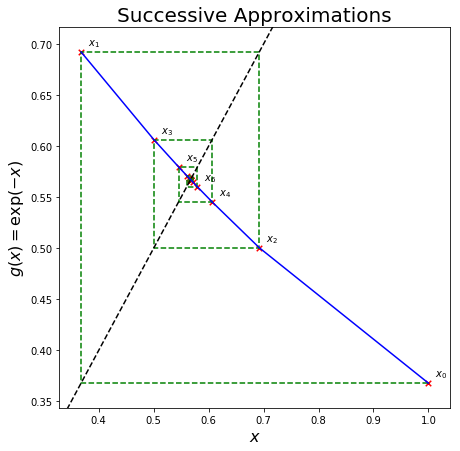

In [4]:
def plot_picard_convergence(f, x, ax, max_labels=6, atol=1.0e-4, flabel=''):
    """ Function to demonstrate/plot the Picard algorithm and its convergence
    """
    # variables to store solution iterations for plotting purposes
    xs = []
    fs = []

    # the following is identical to our iteration above, apart from storing iterations
    x_prev = x + 2*atol
    while abs(x - x_prev) > atol:
        x_prev = x
        x = f(x_prev)
        #print('x_{0:0>2d} = {1:7.5f}.   g(x_{0:0>2d}) = {2:7.5f}.   |x_{0:0>2d} - g(x_{0:0>2d})| = {3:7.5f}'.
        #      format(len(xs), x_prev, x, abs(x_prev-x)))
        xs.append(x_prev)
        fs.append(x)  # as x = g(x_prev) at this point we can store this

    # plot the iteration results
    ax.scatter(xs, fs, marker='x', color='red', s=30)

    # plot the convergence pattern
    x_pattern = [xs[0]]
    f_pattern = [fs[0]]
    for i in range(1, len(xs)):
        x_pattern.append(xs[i])
        f_pattern.append(fs[i-1])
        x_pattern.append(xs[i])
        f_pattern.append(fs[i])
    ax.plot(x_pattern, f_pattern, 'g--')

    # plot the function over the x values considered
    idx_sort = np.argsort(xs)
    ax.plot(np.array(xs)[idx_sort], np.array(fs)[idx_sort], 'b')

    # add some labels
    # figure out a reasonable offset for labels
    dxt = (np.max(x_pattern)-np.min(x_pattern))/50.
    dyt = (np.max(f_pattern)-np.min(f_pattern))/50.
    ax.text(xs[0]+dxt, fs[0]+dyt, '$x_0$')
    # only plot a maximum of max_labels labels, so plot doesn't get too messy
    for i in range(1, min(max_labels+1, len(xs))):
        label = ''.join(['$x_{', str(i), '}$'])
        ax.text(xs[i]+dxt, fs[i]+dyt, label)

    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    ax.set_title('Successive Approximations', fontsize=20)


def g(x):
    return np.exp(-x)

# set up a figure for plotting
fig, ax1 = plt.subplots(figsize=(7, 7))
# set an initial guess - you can try different values for x_guess
x_guess = 1.0
# call our plotting function with above choice of function g(.), use the default stopping criterion
plot_picard_convergence(g, x_guess, ax1, flabel=r'$g(x) = \exp(-x)$')

# add a y=x line without extending the axes limits
ax1.autoscale(False)
xlim = plt.gca().get_xlim()
ax1.plot(xlim, xlim, 'k--')

from myst_nb import glue
glue("picards_method_fig", fig, display=False)

plt.show()

This is a so-called [cobweb plot](https://en.wikipedia.org/wiki/Cobweb_plot). A few observations from the plot:

- We start from \\(x^{(0)}=1.0\\) - shown as \\(x_0\\) in the plot.

- We evaluate \\(g(x^{(0)}) = 0.36788...\\). The red cross marked as \\(x_0\\) is plotted at the location \\((x^{(0)},g(x^{(0)}))\\).

- We set our new iteration value, \\(x^{(1)}\\), to this '\\(y\\)' value (i.e. 0.36788...) - the lowest green dashed horizontal  line takes us from \\(x^{(0)}\\) to this new \\(x^{(1)}\\) - we jump horizontally to the \\(y=x\\) line given by the black dashed line.

- We then evaluate \\(g(x^{(1)}) = 0.69220...\\) - the left most vertical green dashed line takes us to this value on the \\(y\\) axis where the second red cross marked with \\(x_1\\) is plotted at the location \\((x^{(1)},g(x^{(1)})\\).

- We set our new \\(x\\) value to this (0.69220), and this is indicated by the top most horizontal green dashed line taking us back to the \\(y=x\\) black dashed line.

- Evaluate \\(g\\) of this value giving us 0.50047, this is our next vertical line and so on, converging to our fixed point.

This plot shows that our algorithm converges to the point where \\(x = g(x)\\), which in our case is \\(x = \mathrm{e}^{-x}\\). For this example this is the point where both \\(x\\) and \\(g(x)\\) equal \\(\sim\\)0.57. 

It should be obvious that this method is iterative in nature and that the solution can be expected to be an approximation accurate to a tolerance of \\(e \leq\\) `atol`. 

Another way to visualise this is to plot the functions \\(y = x\\) and \\(y = \mathrm{e}^{-x}\\) in \\((x,y)\\) space and find the intersection:

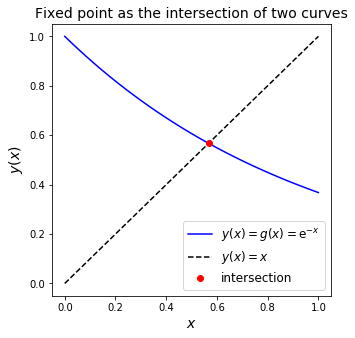

In [5]:
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)

x = np.linspace(0, 1, 100)

ax1.plot(x, np.exp(-x), 'b', label=r'$y(x) = g(x) = \mathrm{e}^{-x}$')
ax1.plot(x, x, 'k--', label='$y(x)=x$')

# Our solution from Picard above: 0.5671430835570621
ax1.plot(0.5671430835570621, 0.5671430835570621, 'ro', label='intersection')
ax1.legend(loc='best', fontsize=12)
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$y(x)$', fontsize=14)
ax1.set_title('Fixed point as the intersection of two curves', fontsize=14)

plt.show()

```{margin} Note
A "fixed point" can always be defined as a "root" of a related problem, but the opposite is not strictly speaking true. However, we will see below how it is possible to update the problem of finding a "root" to finding a "fixed point", and hence reapply this sort of fixed point iteration approach to this more general problem.
```
This graphical method shows the intersection point, \\(x = \mathrm{e}^{-x}\\), also at ~0.57. 

This value is also termed a root of a closely related problem, as it satisfies 

\\[ 0 = f(x) = x - \mathrm{e}^{-x}.\\]

In this expression we rearranged \\(x = \mathrm{e}^{-x}\\) to \\(0 = x - \mathrm{e}^{-x}\\) and defined \\(f(x) = x - \mathrm{e}^{-x}\\). 

Thus, another solution strategy is to find a value \\(x^\star\\) such that \\(f(x^\star) = 0\\), or, in our case, \\(x^\star- \mathrm{e}^{-x^\star} = 0\\). 

We can of course plot a similar intersection figure for this modified problem.

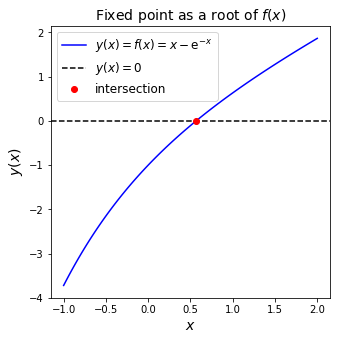

In [6]:
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)

x = np.linspace(-1, 2, 100)

ax1.plot(x, x-np.exp(-x), 'b', label='$y(x) = f(x) = x - \mathrm{e}^{-x}$')
# Add a zero line extending across axes
xlim = ax1.get_xlim()
ax1.plot([xlim[0], xlim[1]], [0., 0.], 'k--', label='$y(x)=0$')
ax1.plot(0.5671, 0., 'ro', label='intersection')
ax1.set_xlim(xlim)
ax1.legend(loc='best', fontsize=12)
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$y(x)$', fontsize=14)
ax1.set_title('Fixed point as a root of $f(x)$', fontsize=14)

plt.show()

## Subintervals and initial guesses

As we have seen from the iterative method above, having a good initial guess is helpful when iterating for a solution to an equation. If you have made an initial guess that is very close to the solution, then it would take much fewer steps to get to the solution.

```{margin} Note
We also should seek to improve upon our iterative methods. We will introduce you to some of the most common solution seeking iterative methods below. Many of these methods share many similarities and have certain differences. In particular, we are interested in the number of steps taken to reach the solution for each method of seeking the solution. If a solution is reached quickly, the computer can spend less time finding the solution. While this may seem trivial when we are doing scalar equations, it would become important when trying to solve equations involving large and complicated matrixes. The fewer number of steps also means there is a much smaller chance that the program will catastrophically fail when trying to reach the solution. You will know the frustration when you are running numerical simulations lasting several hours only for the computer to catastrophically fail in the middle of it, and having to run it again.
```

The graph above shows the root of \\(f(x)\\) at our solution \\(x^* \approx 0.57\\). By visual inspection, we see that \\(f(x)\\) has a root \\(f(x^\star) = 0\\) in the interval \\(x^\star \in (-1,1)\\). 

Let's consider an example:

\\[2x + x \sin(x-3) = 5\quad \text{for}\quad x \in (-10,10).\\]

```{glue:} subinterval_fig
```


By means of visual inspection we can find a subinterval \\((a,b)\\) such that 


1. there exists an \\(x^\star \in (a,b)\\) such that \\(f(x^\star) = 0\\), and 


2. \\(f(x)\\) is [monotonic](https://en.wikipedia.org/wiki/Monotonic_function).

We define \\(f\\) such that the solution to the above equation is a root - i.e. move all the terms on to one side and set equal to zero.

```{margin} Note
Note the caveat that in general we will assume the evaluation of \\(f\\) (or \\(g\\)) is expensive and so we want to do this as few times as possible - generating a nice high resolution plot like this is not something we will be able to do in general.
```

You should find that in \\((a,b)=(0,5)\\), there exists a root, and also the function is monotonically increasing over this interval - we have excluded any local maxima or minima that occur in the function outside this restricted interval.

We can make use of this knowledge to help us identify a good starting guess for the root.


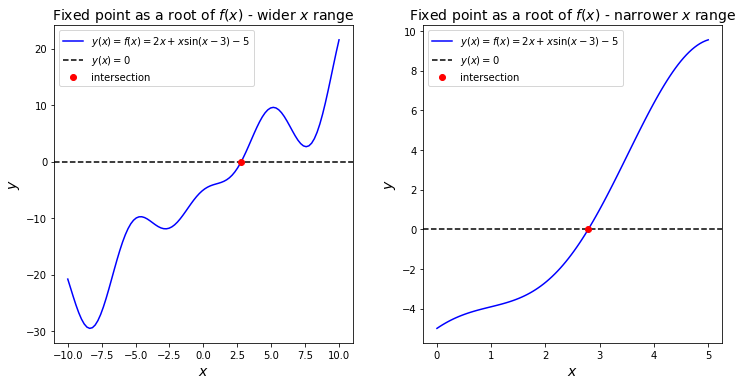

In [7]:
# for this problem we can define f as 5 - (2*x + x*np.sin(x-3)), or (2*x + x*np.sin(x-3)) - 5.
# it makes no difference to the root-finding, just the plots
def f(x):
    return 2*x + x*np.sin(x-3) - 5


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(w_pad=4, h_pad=4)

x = np.linspace(-10. ,10. , 100)
ax1.plot(x, f(x),  'b', label='$y(x) = f(x) = 2x + x\sin(x-3) - 5$')
xlim = ax1.get_xlim()
ax1.plot([xlim[0], xlim[1]], [0., 0.], 'k--', label='$y(x)=0$')
ax1.plot(2.7903546180675676, 0., 'ro', label='intersection')
ax1.set_xlim(xlim)
ax1.legend(loc='best', fontsize=10)
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax1.set_title('Fixed point as a root of $f(x)$ - wider $x$ range', fontsize=14)

x = np.linspace(0., 5., 100)
ax2.plot(x, f(x),  'b', label='$y(x) = f(x) = 2x + x\sin(x-3) - 5$')
xlim = ax2.get_xlim()
ax2.plot([xlim[0], xlim[1]], [0., 0.], 'k--', label='$y(x)=0$')
ax2.plot(2.7903546180675676, 0., 'ro', label='intersection')
ax2.set_xlim(xlim)
ax2.legend(loc='best', fontsize=10)
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_ylabel('$y$', fontsize=14)
ax2.set_title('Fixed point as a root of $f(x)$ - narrower $x$ range', fontsize=14)

glue("subinterval_fig", fig, display=False)

plt.show()

(nm_root_bracketing)=
## Root bracketing
```{index} Root bracketing
```
It can be important where the root lies. By visual inspection we can identify if roots exist for a function, and narrow down the interval in which a root can be found. 

For the equation 

\\[f(x) = x - \text{e}^{-x},\\] 

we have shown by plotting earlier that a root is bounded in \\((-1,1)\\), and that \\(f(x)\\) is monotonically increasing over this interval. 

With this in mind, we can define a [**root bracketing algorithm**](https://en.wikipedia.org/wiki/Root-finding_algorithm#Bracketing_methods) that marches along \\(f(x)\\) in increments of \\(\Delta x\\) and identifies a new, tighter (i.e. smaller) bracket around the root by detecting a change in sign of \\(f(x)\\). 

This algorithm is also referred to as **incremental search**. It is important to know where the root is to solve the equation. If we would have known exactly where the root was, then there would be no need for iterative method. However, we could maybe try to narrow down the location where the root lies. 

We could try to narrow down the area where our root is located. You will use multiple iterations to find the location of your root, and each iteration will improve upon the previous iteration to narrow down where the root is located. We call this root bracketing, since we are trying to find the location of the root by narrowing down the area where the root could be, but also incremental search, since each iteration is based on the previous iteration, and incrementally improves our search for the root. 

For our root bracketing algorithm, we will start with a wide area, and check if there is a root located in that area. If there is a root, then we will break this area we found into smaller subintervals, and then try to find if there is root in them. If we find a root in a subinterval, then we would break this subinterval into even smaller pieces, i.e. subintervals of subinterval, and try to find a root in it. If we don't find a root in a subinterval, or subinterval of subinterval, or subinterval of subinterval of subinterval, then we just ignore it, and only work with subintervals which have root in them. 

The approach can be visualised as follows:

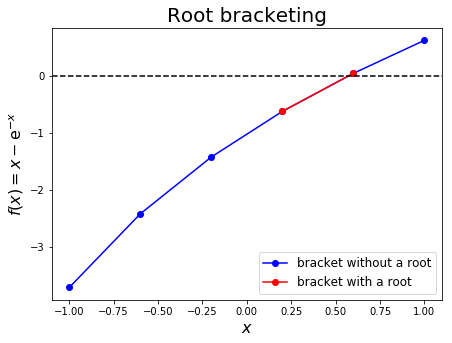

In [8]:
def plot_root_bracketing(f, a, b, dx, ax, xbounds=(-0.1, 1.4), ybounds=(-5, 6), flabel=''):
    x = np.linspace(a, b, int((b-a)/dx)+1)
    y = f(x)
    # plot the sub-intervals in blue
    ax.plot(x, y, 'bo-', label="bracket without a root")
    for i in range(1, len(x)):
        if np.sign(y[i]) != np.sign(y[i-1]):
            # plot the sub-interval where the sign changes in red
            ax.plot([x[i], x[i-1]], [y[i], y[i-1]], 'ro-', label="bracket with a root")
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], 'k--')
    ax.set_xlim(xlim)
    ax.set_title('Root bracketing', fontsize=20)

    
def f(x):
    return x - np.exp(-x)


fig, ax1 = plt.subplots(figsize=(7,5))
    
lower_bound = -1.
upper_bound = 1.
dx = 0.4
plot_root_bracketing(f, lower_bound, upper_bound, dx, ax1, flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

plt.legend(loc="lower right", fontsize=12)

plt.show()

Let's use subinterval \\(x \in(0,5)\\) for \\(2x + x \sin(x-3) = 5\\) to be solved with root bracketing algorithm.

At first we need to define the `root_bracketing` function that will solve for the bracket with the root.

In [9]:
def f(x):
    return 2*x + x*np.sin(x-3) - 5


def root_bracketing(f, a, b, dx):
    """ Function to perform root bracketing on the function f(.)
    between a and b, with fixed interval size dx.
    Returns the bracket of size dx that contains the root.
    """ 
    # The sign function returns:  -1 if x < 0;  0 if x==0;  1 if x > 0.
    sign = np.sign(f(a))
    while sign == np.sign(f(a)):
        a += dx
        if a >= b:
            raise RuntimeError('no root within [a,b]')
    return (a-dx, a)

Now, we can test the function:

In [10]:
a = 0.
b = 5.
dx = 0.1

print('Bracket with a root = (%.3f, %.3f).' % root_bracketing(f, a, b, dx))

Bracket with a root = (2.700, 2.800).


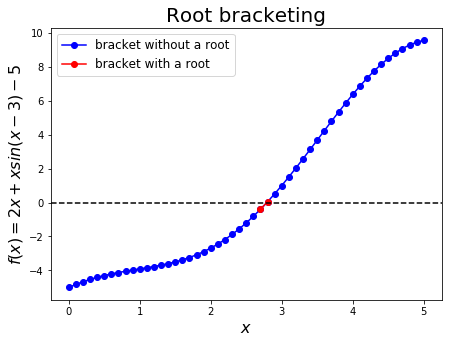

In [11]:
def plot_root_bracketing(f, a, b, dx, ax, xbounds=(-0.1, 1.4), ybounds=(-5, 6), flabel=''):
    x = np.linspace(a, b, int((b-a)/dx)+1)
    y = f(x)
    # plot the sub-intervals in blue
    ax.plot(x, y, 'bo-', label="bracket without a root")
    for i in range(1, len(x)):
        if np.sign(y[i]) != np.sign(y[i-1]):
            # plot the sub-interval where the sign changes in red
            ax.plot([x[i], x[i-1]], [y[i], y[i-1]], 'ro-', label="bracket with a root")
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], 'k--')
    ax.set_xlim(xlim)
    ax.set_title('Root bracketing', fontsize=20)


# let's also use our plotting function from above.
fig, ax1 = plt.subplots(figsize=(7,5))
plot_root_bracketing(f, a, b, 0.1, ax1, flabel=r'$f(x) = 2x + xsin(x-3) - 5$')

plt.legend(loc="best", fontsize=12)
plt.show()

(nm_bisection_method)=
## Bisection method
```{index} Bisection method
```
Once we know that a root can be found in \\(x \in (a,b)\\), we can close in on it with an algorithm similar to root-bracketing/incremental search described above, but with a smart switch to gradually decrease \\(\Delta x\\) by a factor of 1/2, and change the marching direction depending on the sign of \\(f(x_1)f(x_2)\\), where \\(x_1\\) and \\(x_2\\)  are the local bounds considered during the marching process.


The algorithm works as follows:

- If there is a root in the interval \\([x_1, x_2]\\), then \\(f(x_1)f(x_2) < 0\\) (as \\(f(x_1)\\) and \\(f(x_2)\\) will be of different signs)

- In order to halve the interval, we compute \\(f(x_3)\\), where \\(x_3 = (x_1 + x_2)/2\\) is the midpoint of the current interval. 

- If \\(f(x_2)f(x_3) < 0\\), then the root must be in \\([x_2, x_3]\\), and we record this by replacing the original bound \\(x_1\\) by \\(x_3\\),

- otherwise, the root must lie in \\([x_1, x_3\\), in which case \\(x_2\\) is replaced by \\(x_3\\). 

- In either case, the new updated interval \\([x_1, x_2]\\) is half the size of the original interval. 

- The bisection is repeated until the interval has been reduced to some user-defined convergence tolerance.

You can find pseudo-code [here](https://en.wikipedia.org/wiki/Bisection_method#Algorithm).

A visualisation of the method illustrates the narrowing in of an ever-smaller bracket:

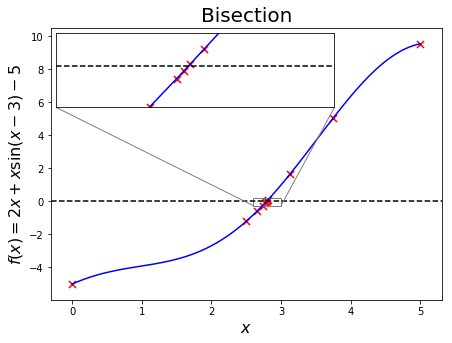

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def plot_bisection(f, x1, x2, ax, tol=1.0e-2, inset=True, ixmin=0.4, ixmax=0.7, iymin=-0.25, iymax=0.2, zoom=5, loc0=4, loc1=2, loc2=1, flabel=''):
    # start by plotting the function over the given bounds (x1, x2)
    x = np.linspace(x1, x2, 100)
    y = f(x)
    ax.plot(x, y, 'b')
    # initialise the first interval
    f1 = f(x1)
    f2 = f(x2)
    x1s = x1
    x2s = x2
    # plot initial interval
    ax.scatter( [x1, x2], [f1, f2], marker='x', color='r', s=50)
    # plot midpoint, and update the appropriate interval limit
    while abs(x1-x2) > tol:
        x3 = 0.5*(x1 + x2)
        f3 = f(x3)
        ax.scatter( [x3], [f3], marker='x', color='r', s=50)
        if f2*f3 < 0.0:
            x1 = x3
            f1 = f3
        else:
            x2 = x3
            f2 = f3

    # add a zero line to the plot to help identify the root
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], color='k', ls='--')
    ax.set_xlim(xlim)
            
    # add a zoomed inset if 'inset=True'
    if inset:
        x1, x2 = x1s, x2s
        ax_ins = zoomed_inset_axes(ax, zoom, loc=loc0)
        # same code/algorithm as above
        x = np.linspace(x1, x2, 100)
        y = f(x)
        ax_ins.plot(x, y, color='b')
        f1 = f(x1)
        f2 = f(x2)
        ax_ins.scatter( [x1,x2], [f1,f2], marker='x', color='r', s=50)
        while abs(x1-x2) > tol:
            x3 = 0.5*(x1 + x2)
            f3 = f(x3)
            ax_ins.scatter( [x3], [f3], marker='x', color='r', s=50)
            if f2*f3 < 0.0:
                x1 = x3
                f1 = f3
            else:
                x2 = x3
                f2 = f3
        ax_ins.plot([ixmin,ixmax],[0.,0.], color='k',ls='--')
        ax_ins.set_xlim(ixmin, ixmax)
        ax_ins.set_ylim(iymin, iymax)
        ax_ins.get_xaxis().set_visible(False)
        ax_ins.get_yaxis().set_visible(False)
        # draw a box of area covered in main image and lines from corners to indicate zoom
        mark_inset(ax, ax_ins, loc1=loc1, loc2=loc2, fc='none', ec='0.5')
        
    xf = (x1 + x2)/2.0
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    ax.set_title('Bisection', fontsize=20)
    

# Let's see what it looks like for our example.

def f(x):
    return 2*x + x*np.sin(x-3) - 5


fig, ax1 = plt.subplots(figsize=(7,5))
plot_bisection(f, 0., 5., ax1, tol=1.0e-2, inset=True, 
               ixmin=2.6, ixmax=3., iymin=-0.25, iymax=0.2,
               zoom=10, loc0=2, loc1=3, loc2=4,
               flabel=r'$f(x) = 2x + x\sin(x-3) - 5$')

This algorithm has been implemented by SciPy under [`scipy.optimize.bisect`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html). An example below shows how to use it:

In [13]:
def f(x):
    return x - np.exp(-x)

a, b = -1., 1.
print("Root from SciPy bisection method = ", sop.bisect(f, a, b))

Root from SciPy bisection method =  0.5671432904109679


We can write our own code to implement a bisection algorithm and solve again for \\(2x + x \sin(x-3) = 5\\):

In [14]:
def bisection(fct, a, b, atol=1.0E-6, nmax=100):
    n = 0
    while n <= nmax:
        c = (a+b)/2.
        if fct(c) == 0. or (b-a)/2. < atol:
            return c
        n += 1
        if np.sign(fct(c)) == np.sign(fct(a)):
            a = c
        else:
            b = c
    raise RuntimeError('no root found within [a,b]')

def f(x):
    return 2*x + x*np.sin(x-3) - 5

a, b = 0., 5.
print("Our code = ", bisection(f, a, b))
print("SciPy code = ", sop.bisect(f, a, b))

Our code =  2.790355086326599
SciPy code =  2.7903546180675676


## Newton method

So far, above iterative algorithms use only one part of a functions information: its value, \\(f(x)\\). Newton's method additionally uses \\(f'(x)\\) to infer the trend of the function in the vicinity of \\(x\\). This slope, together with the function value \\(f(x)\\), is used to find the intersection of the tangent at \\(x\\) with zero to get an improved guess of the root. The formula can be derived from the Taylor series expansion:

\\[ f(x_{i+1}) = f(x_i) + f'(x_i)(x_{i+1}-x_i) + O(x_{i+1} - x_i)^2.\\]

Let \\(f(x_{i+1}) = 0\\) to find

\\[ 0 = f(x_i) + f'(x_i)(x_{i+1}-x_i) + O(x_{i+1} - x_i)^2\\]

assuming \\(x_{i+1}\\) close to \\(x_{i}\\) we drop the higher order terms to find

\\[ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}\\]

which is the Newton-Raphson formula.

A pseudo pseudo-code for the algorithm looks like this:

```
    guess x[0]
    do
        x[i] = x[i-1] - f(x[i-1])/dfdx(x[i-1])
    while abs(x[i] - x[i-1]) > tolerance
```

The expression of the associated error indicates quadratic convergence:

\\[\epsilon_{i+1} = -\frac{f''(x)}{2f'(x)} \epsilon_{i}^2\\]

```{margin} Note
Note that the green dashed lines extend off from the current iteration in the direction given by the slope of the blue line
```
Illustrated, for \\(f(x) = x - \mathrm{e}^{-x}\\), this approximation looks like the following:

```{glue:} newton_method_fig1
```

```{glue:} newton_method_fig2
```

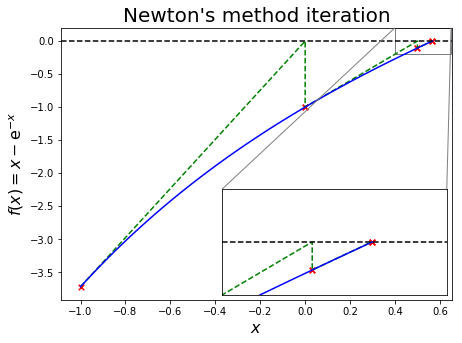

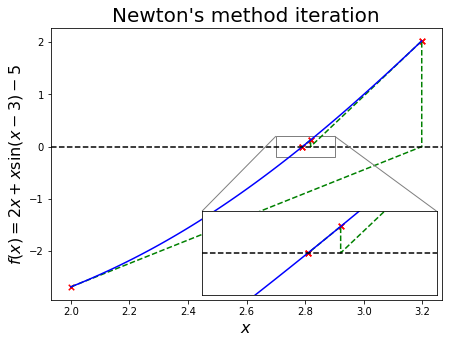

In [15]:

def plot_newton(f, dx, x_0, atol, ax, inset=True, ixmin=3.0, ixmax=3.2, 
                iymin=-0.1, iymax=0.1, zoom=8, loc0=1, loc1=3, loc2=2, maxiter=100, resfct=100, flabel=''):
    x_n = [x_0]
    y_n = [f(x_0)]    
    
    # Newton iteration
    i = 0
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    while 1:
        # approximate gradient - computed using a dx value - note comments below on quasi-newton
        dfdx = (f(x_n[-1]+dx) - f(x_n[-1])) / dx
        # Newton-Raphson update
        x_zero = x_n[-1] - ( f(x_n[-1]) / dfdx )
        x_n.append(x_zero)        
        y_n.append(0.)
        if abs(x_n[-1]-x_n[-2]) < atol:
            break
        x_n.append(x_zero)
        y_n.append(f(x_zero))
        i = i+1
        if i >= maxiter:
            break
        
    # the iteration results
    ax.scatter(x_n, f(np.array(x_n)), marker='x', color='red', s=30)
    
    # the convergence pattern
    ax.plot(x_n, y_n, color='green', ls='--')
        
    # the function
    x = np.linspace( np.min(x_n), np.max(x_n), resfct)
    ax.plot(x, f(x), 'b')
    
    # zero line
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], 'k--')
    ax.set_xlim(xlim)

    # zoomed inset
    if inset:
        axins = zoomed_inset_axes(ax, zoom, loc=loc0)
        axins.scatter(x_n, f(np.array(x_n)), marker='x', color='red', s=30)
        axins.plot(x_n, y_n, color='green', ls='--')
        axins.plot(x, f(x), 'b')
        axins.plot([ixmin,ixmax],[0.,0.], 'k--')
        axins.set_xlim(ixmin, ixmax)
        axins.set_ylim(iymin, iymax)
        axins.get_xaxis().set_visible(False)
        axins.get_yaxis().set_visible(False)
        mark_inset(ax, axins, loc1=loc1, loc2=loc2, fc="none", ec="0.5")
    
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    ax.set_title("Newton's method iteration", fontsize=20)


# case 1
def f(x):
    return x - np.exp(-x)

fig, ax1 = plt.subplots(figsize=(7,5))
x0 = -1.
plot_newton(f, 1.e-3, x0, 1.e-2, ax1, loc0=4, loc1=2, loc2=1,
                                            zoom=4, ixmin=0.4, ixmax=0.65, iymin=-0.2, iymax=0.2,
                                            flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

glue("newton_method_fig1", fig, display=False)
plt.show()

# case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5

fig, ax1 = plt.subplots(figsize=(7,5))
x0 = 2.0

plot_newton(f, 1.e-3, x0, 1.e-2, ax1, loc0=4, loc1=2, loc2=1,
                                            zoom=4, ixmin=2.7, ixmax=2.9, iymin=-0.2, iymax=0.2,
                                            flabel=r'$f(x) = 2x + x\sin(x-3) - 5$')

glue("newton_method_fig2", fig, display=False)

plt.show()

The method has been implemented by SciPy - [`scipy.optimize.newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html).

In [16]:
def f(x):
    return x - np.exp(-x)

def dfdx(x):
    return 1 + np.exp(-x)

x0 = -1. # initial guess
print("SciPy code = ",sop.newton(f, x0, dfdx))

SciPy code =  0.567143290409784


We can write our own code to implement a Newton's method and solve again for \\(2x + x \sin(x-3) = 5\\):

In [17]:
def newton(f, x0, dfdx, atol=1.0e-6):
    """ Function to implement the Newton-Raphson method
    
    f is the function we are trying to find a root of
    
    and dfdx is another function which return the derivative of f
    """
    x = [x0]
    fevals = 0
    
    while True:
        # Two function evaluations (f and dfdx)
        x.append(x[-1] - f(x[-1])/dfdx(x[-1]))
        fevals += 2
        if abs(x[-1]-x[-2]) < atol:
            print('Newton (analytical derivative) used',
                  fevals, 'function evaluations')
            return x[-1]
        

def f(x):
    return 2*x + x*np.sin(x-3) - 5

def dfdx(x):
    return 2 - np.sin(3-x) + x*np.cos(3-x)

x0 = 0.  # Initial guess
print("Our solution = ", newton(f, x0, dfdx))
print("SciPy solution = ", sop.newton(f, x0, dfdx))

Newton (analytical derivative) used 10 function evaluations
Our solution =  2.7903546180673837
SciPy solution =  2.7903546180673837


## (Quasi-) Newton with approximate derivative
The implementation of the Newton method above assumes that the derivative \\(f^\prime(x)\\) is readily available.

For many problems, however, the derivative is not easy to express analytically or we just don't want to bother working it out and writing a function to implement it.

In these cases \\(f^\prime(x)\\) can be replaced by a difference approximation such as

\\[ f'(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}. \\]

Use of an approximate derivative renders the corresponding root finding algorithm a co-called quasi-Newton method.

Note that since we only have an approximate derivative we cannot in general expect this method to converge as well as Newton when we supply it with an exact derivative. This manifests in a reduction from perfect quadratic convergence - but still generally closer to quadratic that linear!

We will extend the Newton algorithm to compute \\(f'(x)\\) using the finite difference approximation.

In [18]:

def quasi_newton(f, x0, dx=1.0E-7, atol=1.0E-6):
    """ Function to implement quasi-newton
    
    f is the function we are trying to find a root of
    """
    x = [x0]
    while True:
        dfdx = (f(x[-1] + dx) - f(x[-1]))/(dx)
        x.append(x[-1] - f(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]

def f(x):
    return 2*x + x*np.sin(x-3) - 5

x0 = 0.
print("Our solution = ", quasi_newton(f, x0))
print("SciPy solution = ", sop.newton(f, x0))

Our solution =  2.7903546180673837
SciPy solution =  2.7903546180673837


(nm_secant_method)=
## Secant method
```{index} Secant method of root finding
```

The secant method replaces the local derivative in the Newton method by a difference approximation based on two consecutive \\(x_n\\). It follows that

\\[ f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}\\]

which leads to the secant method

\\[x_{n+1} = x_n - f(x_n) \left ( \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} \right )\\]
The algorithm can be visualized as follows:

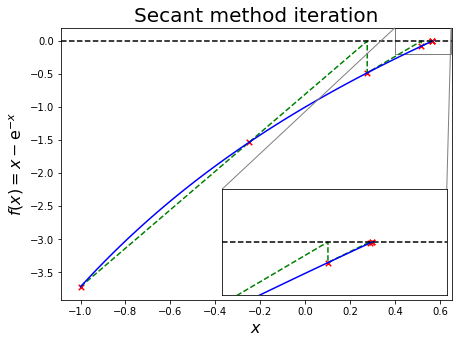

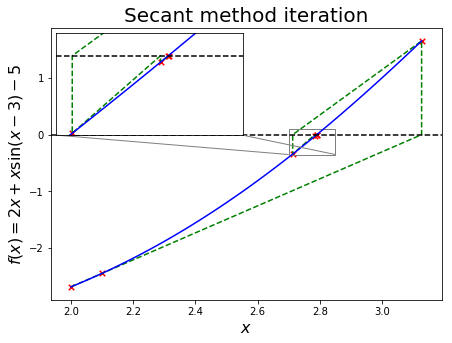

In [19]:
def plot_secant(f, x_0, x_1, atol, ax, max_labels0=1, inset=True, ixmin=3.0, ixmax=3.2, 
                iymin=-0.1, iymax=0.1, zoom=8, loc0=1, loc1=3, loc2=2, maxiter=100, resfct=100, flabel=''):
    # variables to store to convergence pattern, initialise with two initial guess values
    x_n = [x_0, x_1] 
    y_n = [f(x_0), f(x_1)]    
    x_its = [x_0, x_1]
    # iterate secant method and store iteration convergence pattern
    i = 0
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    while 1:     
        # Secant update
        x_zero = x_its[-1] - f(x_its[-1])*( (x_its[-1] - x_its[-2]) / (f(x_its[-1]) - f(x_its[-2])) )
        x_n.append(x_zero)        
        y_n.append(0.)
        x_its.append(x_zero)
        if abs( x_n[-1] - x_n[-2] ) < atol:
            break
        x_n.append(x_zero)
        y_n.append(f(x_zero))
        i = i+1
        if i >= maxiter:
            break

    # the iteration results
    ax.scatter(x_its, f(np.array(x_its)), marker='x', color='red', s=30)
    
    # the convergence pattern
    ax.plot(x_n, y_n, color='green', ls='--')
     
    # the function
    x = np.linspace( np.min(x_n), np.max(x_n), resfct)
    ax.plot(x, f(x), 'b')

    # zero line
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], 'k--')
    ax.set_xlim(xlim)

    # zoomed inset
    if inset:
        axins = zoomed_inset_axes(ax, zoom, loc=loc0)
        axins.scatter(x_its, f(np.array(x_its)), marker='x', color='red', s=30)
        axins.plot(x_n, y_n, color='green', ls='--')
        axins.plot(x, f(x), 'b')
        axins.plot([ixmin,ixmax],[0.,0.], 'k--')
        axins.set_xlim(ixmin, ixmax)
        axins.set_ylim(iymin, iymax)
        axins.get_xaxis().set_visible(False)
        axins.get_yaxis().set_visible(False)
        mark_inset(ax, axins, loc1=loc1, loc2=loc2, fc="none", ec="0.5")        
        
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    ax.set_title('Secant method iteration', fontsize=20)


# case 1
def f(x):
    return x - np.exp(-x)


x0 = -1.
x1 = x0+0.75
fig, ax1 = plt.subplots(figsize=(7,5))
plot_secant(f, x0, x1, 1E-3, ax1, loc0=4, loc1=2, loc2=1,
                                            zoom=4, ixmin=0.4, ixmax=0.65, iymin=-0.2, iymax=0.2,
                                            flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

# case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5


fig, ax1 = plt.subplots(figsize=(7,5))
x0 = 2.
x1 = x0+0.1
plot_secant(f, x0, x1, 1E-3, ax1, loc0=2, loc1=3, loc2=4, inset=True,
                                            zoom=4, ixmin=2.7, ixmax=2.85, iymin=-0.35, iymax=0.1,
                                            flabel=r'$f(x) = 2x + x\sin(x-3) - 5$')

For \\(2x + x \mathrm{sin}(x-3) = 5\\), we will use subinterval \\(x \in(0,5)\\) to find \\(x_0 = 0\\) and \\(x_1 = 0+0.1\\), implement a secant algorithm and compare the result to `scipy.optimize.newton`.

In [20]:
def secant(f, x0, x1, atol=1.0E-6):
    """ Function to implement the secant method
    
    x0 and x1 are the two required guesses
    
    f is the function we are trying to find a root of
    """
    x = [x0, x1]
    while True:
        dfdx = (f(x[-1])-f(x[-2])) / (x[-1]-x[-2])
        x.append(x[-1] - f(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]

def f(x):
    return 2*x + x*np.sin(x-3) - 5

x0 = 0.
x1 = x0+0.1
print("Our solution = ", secant(f, x0, x1))
print("SciPy solution = ", sop.newton(f, x0))

Our solution =  2.7903546180673446
SciPy solution =  2.7903546180673837


## Potential convergence issues

It's important to understand the ways some of the methods we've introduced can go wrong, and again to emphasise the value of a good starting guess.

Let's start by illustrating the basic concept of Newton root-finding methods for a well-behaved function

\\[ f(x) = x^4 - 5.\\]

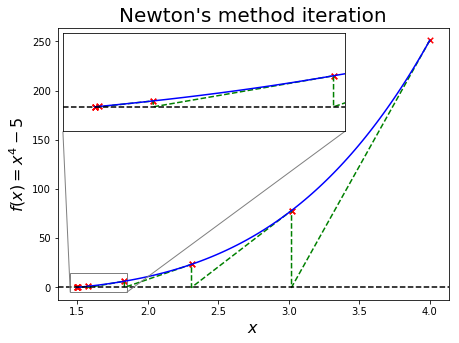

In [21]:
def f(x):
    return x**4 - 5

fig, ax1 = plt.subplots(figsize=(7,5))
x0 = 4.0
plot_newton(f, 1.e-8, x0, 1.e-7, ax1, loc0=2, loc1=3, loc2=4, zoom=5,
                                            ixmin=1.45, ixmax=1.85, iymin=-5, iymax=15, flabel=r'$f(x) = x^4 - 5$')

plt.show()

We've said several times now that the convergence of many algorithms often depends on the initial values provided to them.

Complex equations, or systems thereof, provide plenty of situations that prevent convergence all together, lead to slow convergence, or cause convergence to an undesired root (e.g. one that is far from, and not the closest to, the initial guess). Their solution strongly depends on having a good initial guess.

For example,

\\[ f(x) = x\, \sin(\pi x) - e^{-x}, \\]
provides for ample pitfalls, in particular for gradient-based methods (e.g. Newton and secant).

We will illustrate these convergence issues below.

They mostly fall into one of three categories:

- Multiple roots in the vicinity - the algorithm converges to one of them, but this "one" could change with only slight changes to the initial guess.
- Nearly singular/numerical overflow - the local gradient at guess \\(x^{(k)}\\) is near zero, so that \\(x^{(k+1)}\\), the intersection of the local gradient approximation with the \\(x\\) axis is beyond the representable range. Even if we don't get overflow, we can still jump to a location a long distance away from our initial guess and end up converging to the wrong root.
- Oscillations - the algorithm bounces back and forth between (near) identical \\(x^{(k)}\\).

### Multiple roots

For many functions multiple roots exist, and the algorithm depends on and can be sensitive to the initial guess.

Let's see an example where we choose two initial guesses (0.0 and 0.1) and visualise how this relatively small difference leads to convergence to different roots.

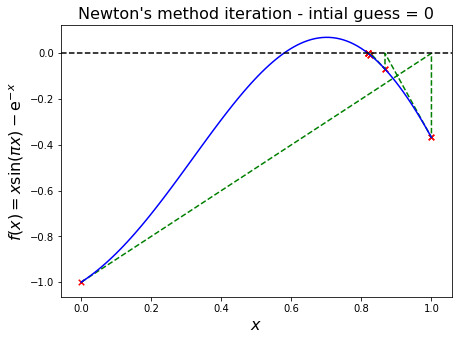

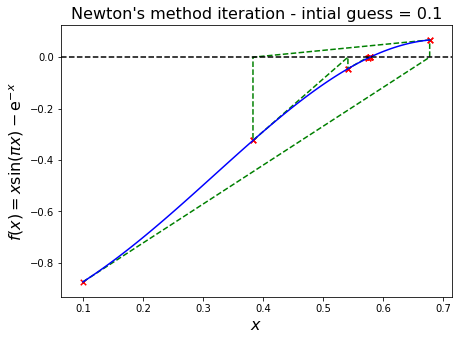

In [22]:
def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)

fig, ax1 = plt.subplots(figsize=(7,5))
x0 = 0.0
plot_newton(f, 1.e-8, x0, 1.e-7, ax1, inset=False, flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')

plt.title("Newton's method iteration - intial guess = %g" % x0, fontsize=16)
plt.show()

def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)

fig, ax1 = plt.subplots(figsize=(7,5))
# a small perturbation to the initial guess
x0 = 0.1
plot_newton(f, 1.e-8, x0, 1.e-7, ax1, inset=False, flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')
plt.title("Newton's method iteration - intial guess = %g" % x0, fontsize=16)
plt.show()

We see from the first plot that this problem has roots at just under 0.6 and just over 0.8. The initial guess of 0 leads to convergence of the Newton iteration to the larger root, whereas a slightly higher initial guess of 0.1 leads to the smaller root!

We confirm this behaviour is not a product of an issue with our implementation, and print the two actual root values, using calls to the SciPy function below.

In [23]:
x0 = 0.0
print("Solution for initial guess 0.0 = ", sop.newton(f, x0))
x0 = 0.1
print("Solution for initial guess 0.1 = ", sop.newton(f, x0))

Solution for initial guess 0.0 =  0.8191177934425945
Solution for initial guess 0.1 =  0.578262577864515


### Nearly singular/numerical overflow
In this case the gradient \\(f'(x^{(k)})\\) is close to zero, so that the new iteration value, \\(x^{(k+1)}\\), is orders of magnitude offset, perhaps too big even to be representable on our finite computer (overflow).

We see this with the following example.

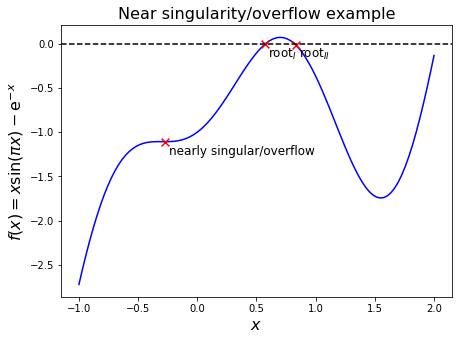

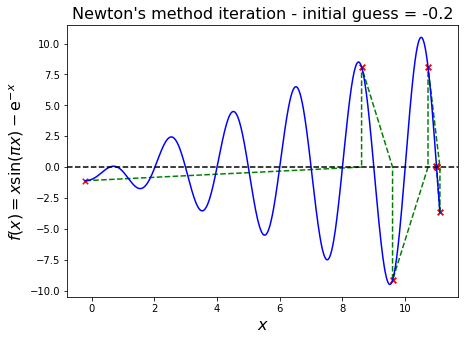

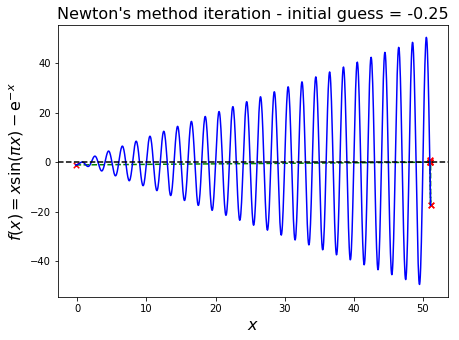

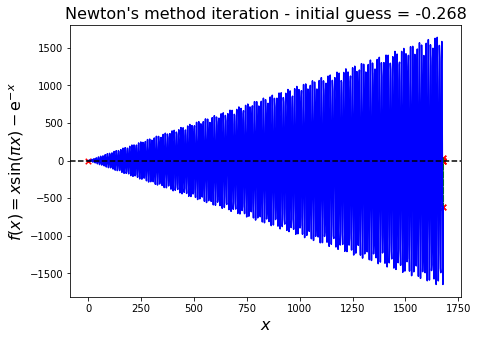

In [24]:
def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)

x = np.linspace(-1, 2, 100)
y = f(x)

fig, ax1 = plt.subplots(figsize=(7, 5))

ax1.plot(x, y, color='b', zorder=0)
xs = [0.57, 0.83, -0.27]
texts = ['root$_I$', 'root$_{II}$', 'nearly singular/overflow']
for i in range(len(xs)):
    ax1.scatter([xs[i]], [f(xs[i])], marker='x', color='r', s=60)
    ax1.text(xs[i]+0.03, f(xs[i])-0.15, texts[i], fontsize=12)
xlim = ax1.get_xlim()
ax1.plot([xlim[0], xlim[1]], [0., 0.], 'k--', label='$y(x)=0$')
ax1.set_xlim(xlim)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$', fontsize=16)
ax1.set_title('Near singularity/overflow example', fontsize=16)

plt.show()

fig, ax1 = plt.subplots(figsize=(7,5))
x0 = -0.2
plot_newton(f, 1.e-8, x0, 1.e-7, ax1, inset=False, maxiter=100, resfct=1000,
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')

plt.title("Newton's method iteration - initial guess = %g" % x0, fontsize=16)
plt.show()


fig, ax1 = plt.subplots(figsize=(7,5))
x0 = -0.25
plot_newton(f, 1.e-8, x0, 1.e-7, ax1, inset=False, maxiter=100, resfct=1000,
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')

plt.title("Newton's method iteration - initial guess = %g" % x0, fontsize=16)
plt.show()

def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)

fig, ax1 = plt.subplots(figsize=(7,5))
x0 = -0.268
plot_newton(f, 1.e-8, x0, 1.e-7, ax1, inset=False, maxiter=100, resfct=1000,
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')

plt.title("Newton's method iteration - initial guess = %g" % x0, fontsize=16)
plt.show()

### Oscillation
In this scenario the iterations are trapped in a region with gradients of approximately equal magnitude but opposite directions.

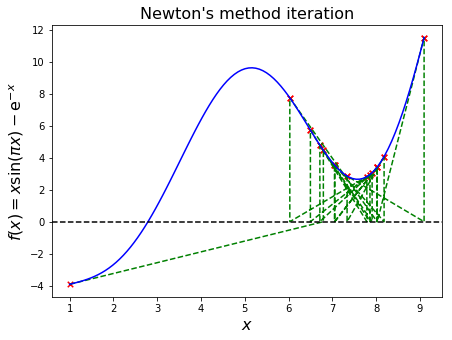

In [25]:
def f(x):
    return 2*x + x*np.sin(x-3) - 5

fig, ax1 = plt.subplots(figsize=(7,5))
x0 = 1.
plot_newton(f, 1.e-8, x0, 1.e-7, ax1, inset=False, maxiter=14, 
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')
plt.title("Newton's method iteration", fontsize=16)
plt.show()

What happens if you increase the number of iterations?

Another similar example:

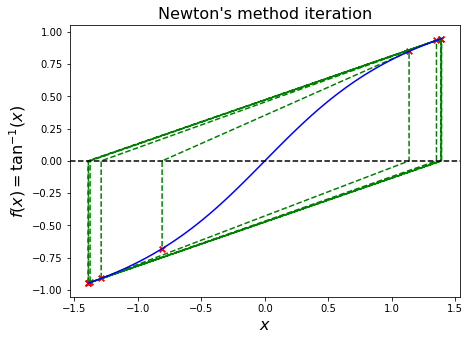

In [26]:
def f(x):
    return np.arctan(x)

fig, ax1 = plt.subplots(figsize=(7,5))
x0 = -1.3917
plot_newton(f, 1.e-8, x0, 1.e-7, ax1, inset=False, maxiter=10, 
                                            flabel='$f(x)= \mathrm{tan}^{-1}(x)$')

plt.title("Newton's method iteration", fontsize=16)
plt.show()